In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
symbol = 'TSLA'
start = '2023-11-21'
end = '2024-11-21'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-11-21,241.199997,241.199997,243.619995,233.339996,235.039993,122288000
2023-11-22,234.210007,234.210007,244.009995,231.399994,242.039993,117950600
2023-11-24,235.449997,235.449997,238.750000,232.330002,233.750000,65125200
2023-11-27,236.080002,236.080002,238.330002,232.100006,236.889999,112031800
2023-11-28,246.720001,246.720001,247.000000,234.009995,236.679993,148549900


In [4]:
def myRSI(price, n=14):
    delta = price['Close'].diff()
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0

    RolUp = dUp.rolling(window=n).mean()
    RolDown = dDown.rolling(window=n).mean().abs()
    
    RS = RolUp / RolDown
    rsi= 100.0 - (100.0 / (1.0 + RS))
    return rsi

df['RSI'] = myRSI(df)

In [5]:
df.head(20)

Price,Adj Close,Close,High,Low,Open,Volume,RSI
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-11-21,241.199997,241.199997,243.619995,233.339996,235.039993,122288000,NaN
2023-11-22,234.210007,234.210007,244.009995,231.399994,242.039993,117950600,NaN
2023-11-24,235.449997,235.449997,238.750000,232.330002,233.750000,65125200,NaN
2023-11-27,236.080002,236.080002,238.330002,232.100006,236.889999,112031800,NaN
2023-11-28,246.720001,246.720001,247.000000,234.009995,236.679993,148549900,NaN
2023-11-29,244.139999,244.139999,252.750000,242.759995,249.210007,135401300,NaN
2023-11-30,240.080002,240.080002,245.220001,236.910004,245.139999,132353200,NaN
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,NaN


Text(0.5, 0, 'Date')

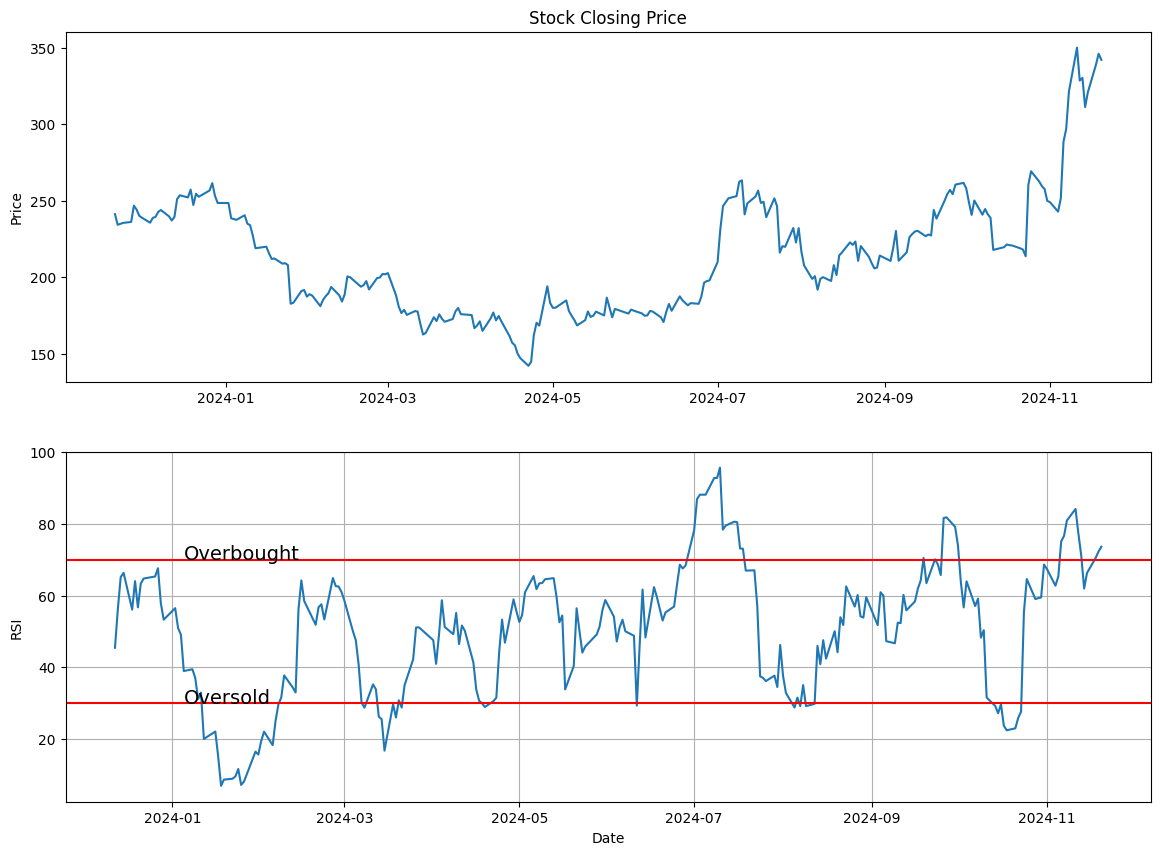

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strength Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
ax2.axhline(y=70, color='red')
ax2.axhline(y=30, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')

In [11]:
print(df)

Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2023-11-21  241.199997  241.199997  243.619995  233.339996  235.039993   
2023-11-22  234.210007  234.210007  244.009995  231.399994  242.039993   
2023-11-24  235.449997  235.449997  238.750000  232.330002  233.750000   
2023-11-27  236.080002  236.080002  238.330002  232.100006  236.889999   
2023-11-28  246.720001  246.720001  247.000000  234.009995  236.679993   
...                ...         ...         ...         ...         ...   
2024-11-14  311.179993  311.179993  329.980011  310.369995  327.690002   
2024-11-15  320.720001  320.720001  324.679993  309.220001  310.570007   
2024-11-18  338.739990  338.739990  348.549988  330.010010  340.730011   
2024-11-19  346.000000  346.000000  347.380005  332.750000  335.760010   
2024-11-20  342.029999  342.029999  34

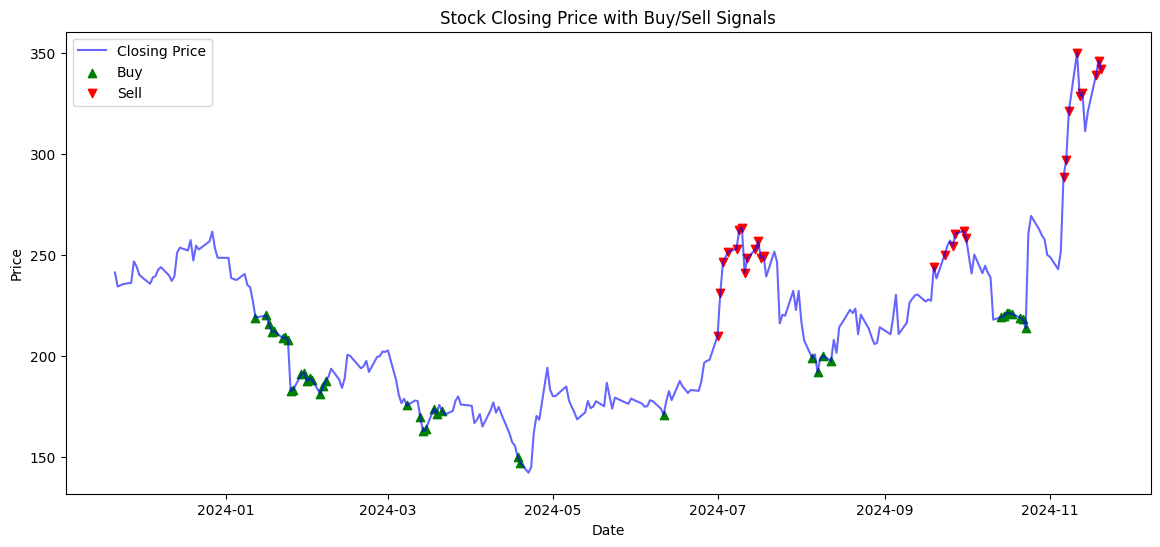

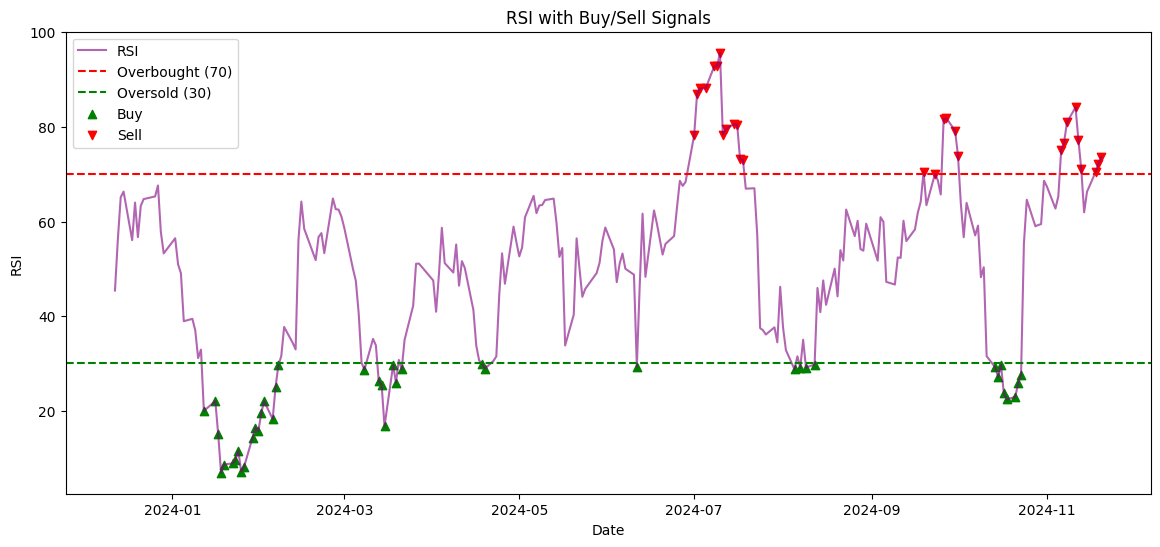

In [15]:
# Buy and sell conditions
df['Buy_Signal'] = (df['RSI'] < 30)  # Buy when RSI < 30
df['Sell_Signal'] = (df['RSI'] > 70) # Sell when RSI > 70

# Get buy and sell indices for plotting
buy_indices = df[df['Buy_Signal']].index
sell_indices = df[df['Sell_Signal']].index

# Plot the stock closing price
plt.figure(figsize=(14, 6))
plt.plot(df['Adj Close'], label='Closing Price', color='blue', alpha=0.6)

# Overlay buy points
plt.scatter(buy_indices, df.loc[buy_indices, 'Close'], label='Buy', marker='^', color='green', alpha=1)

# Overlay sell points
plt.scatter(sell_indices, df.loc[sell_indices, 'Close'], label='Sell', marker='v', color='red', alpha=1)

# Add labels and legend
plt.title("Stock Closing Price with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot the RSI graph
plt.figure(figsize=(14, 6))
plt.plot(df['RSI'], label='RSI', color='purple', alpha=0.6)
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Overlay buy points
plt.scatter(buy_indices, df.loc[buy_indices, 'RSI'], label='Buy', marker='^', color='green', alpha=1)

# Overlay sell points
plt.scatter(sell_indices, df.loc[sell_indices, 'RSI'], label='Sell', marker='v', color='red', alpha=1)

# Add labels and legend
plt.title("RSI with Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


In [24]:
# Initialize divergence signals
df['Bullish_Divergence'] = False
df['Bearish_Divergence'] = False
df = df.reset_index(drop=True)
# Find divergences
for i in range(1, len(df)):
    if df['Adj Close'].iloc[i] < df['Adj Close'].iloc[i - 1] and df['RSI'].iloc[i] > df['RSI'].iloc[i - 1]:
        df.loc[df.index[i], 'Bullish_Divergence'] = True

    if df['Adj Close'].iloc[i] > df['Adj Close'].iloc[i - 1] and df['RSI'].iloc[i] < df['RSI'].iloc[i - 1]:
        df.loc[df.index[i], 'Bearish_Divergence'] = True


# Get indices for divergences
bullish_indices = df[df['Bullish_Divergence']].index
bearish_indices = df[df['Bearish_Divergence']].index

# Plot the price graph with divergence points
plt.figure(figsize=(14, 6))
plt.plot(df['Adj Close'], label='Closing Price', color='blue', alpha=0.6)

# Overlay bullish divergence points
plt.scatter(bullish_indices, df.loc[bullish_indices, 'Adj Close'], label='Bullish Divergence (Buy)', marker='^', color='green', alpha=1)

# Overlay bearish divergence points
plt.scatter(bearish_indices, df.loc[bearish_indices, 'Adj Close'], label='Bearish Divergence (Sell)', marker='v', color='red', alpha=1)

# Add labels and legend
plt.title("Price Chart with Bullish and Bearish Divergences")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot the RSI graph with divergence points
plt.figure(figsize=(14, 6))
plt.plot(df['RSI'], label='RSI', color='purple', alpha=0.6)

# Overlay bullish divergence points
plt.scatter(bullish_indices, df.loc[bullish_indices, 'RSI'], label='Bullish Divergence (Buy)', marker='^', color='green', alpha=1)

# Overlay bearish divergence points
plt.scatter(bearish_indices, df.loc[bearish_indices, 'RSI'], label='Bearish Divergence (Sell)', marker='v', color='red', alpha=1)

# Add thresholds
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Add labels and legend
plt.title("RSI Chart with Bullish and Bearish Divergences")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().